<a href="https://colab.research.google.com/github/AnnaRomanyuk/ML_Labs/blob/main/homework_practice_03_gd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **25.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **28.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

$$\frac{\partial Q(w)}{\partial w} = \frac{\partial }{\partial w}[\dfrac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)]$$

$$\frac{\partial}{\partial w} [w^TX^TXw] = (X^TX + X^TX)w$$

$$\nabla Q(w) = \dfrac{1}{\ell}(2X^TXw - 2X^Ty)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1} + \varepsilon}} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [ ]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%autoreload 2

import numpy as np

In [ ]:
from descents import get_descent
from linear_regression import LinearRegression

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

**Никнейм: dima.zhernokleev**

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/29933/run-report/55380833/


* **StochasticDescent**: https://contest.yandex.ru/contest/29933/run-report/55380868/


* **MomentumDescent**: https://contest.yandex.ru/contest/29933/run-report/55380929/


* **Adam**: https://contest.yandex.ru/contest/29933/run-report/55380963/


* **LinearRegression**: https://contest.yandex.ru/contest/29933/run-report/55381009/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [ ]:
data = pd.read_csv('autos.csv', error_bad_lines=False)

<ipython-input-24-8c9e990711eb>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('autos.csv', error_bad_lines=False)
Skipping line 17132: expected 10 fields, saw 12
Skipping line 51386: expected 10 fields, saw 13

Skipping line 68504: expected 10 fields, saw 13
Skipping line 102760: expected 10 fields, saw 12



In [ ]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75.0,150000.0,177.0,1500.0
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69.0,90000.0,93.0,3600.0
2,bmw,3er,limousine,manuell,benzin,ja,102.0,150000.0,246.0,650.0
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109.0,150000.0,140.0,2200.0
4,mazda,3_reihe,limousine,manuell,benzin,nein,105.0,150000.0,136.0,2000.0


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [ ]:
data.shape[0]

241186

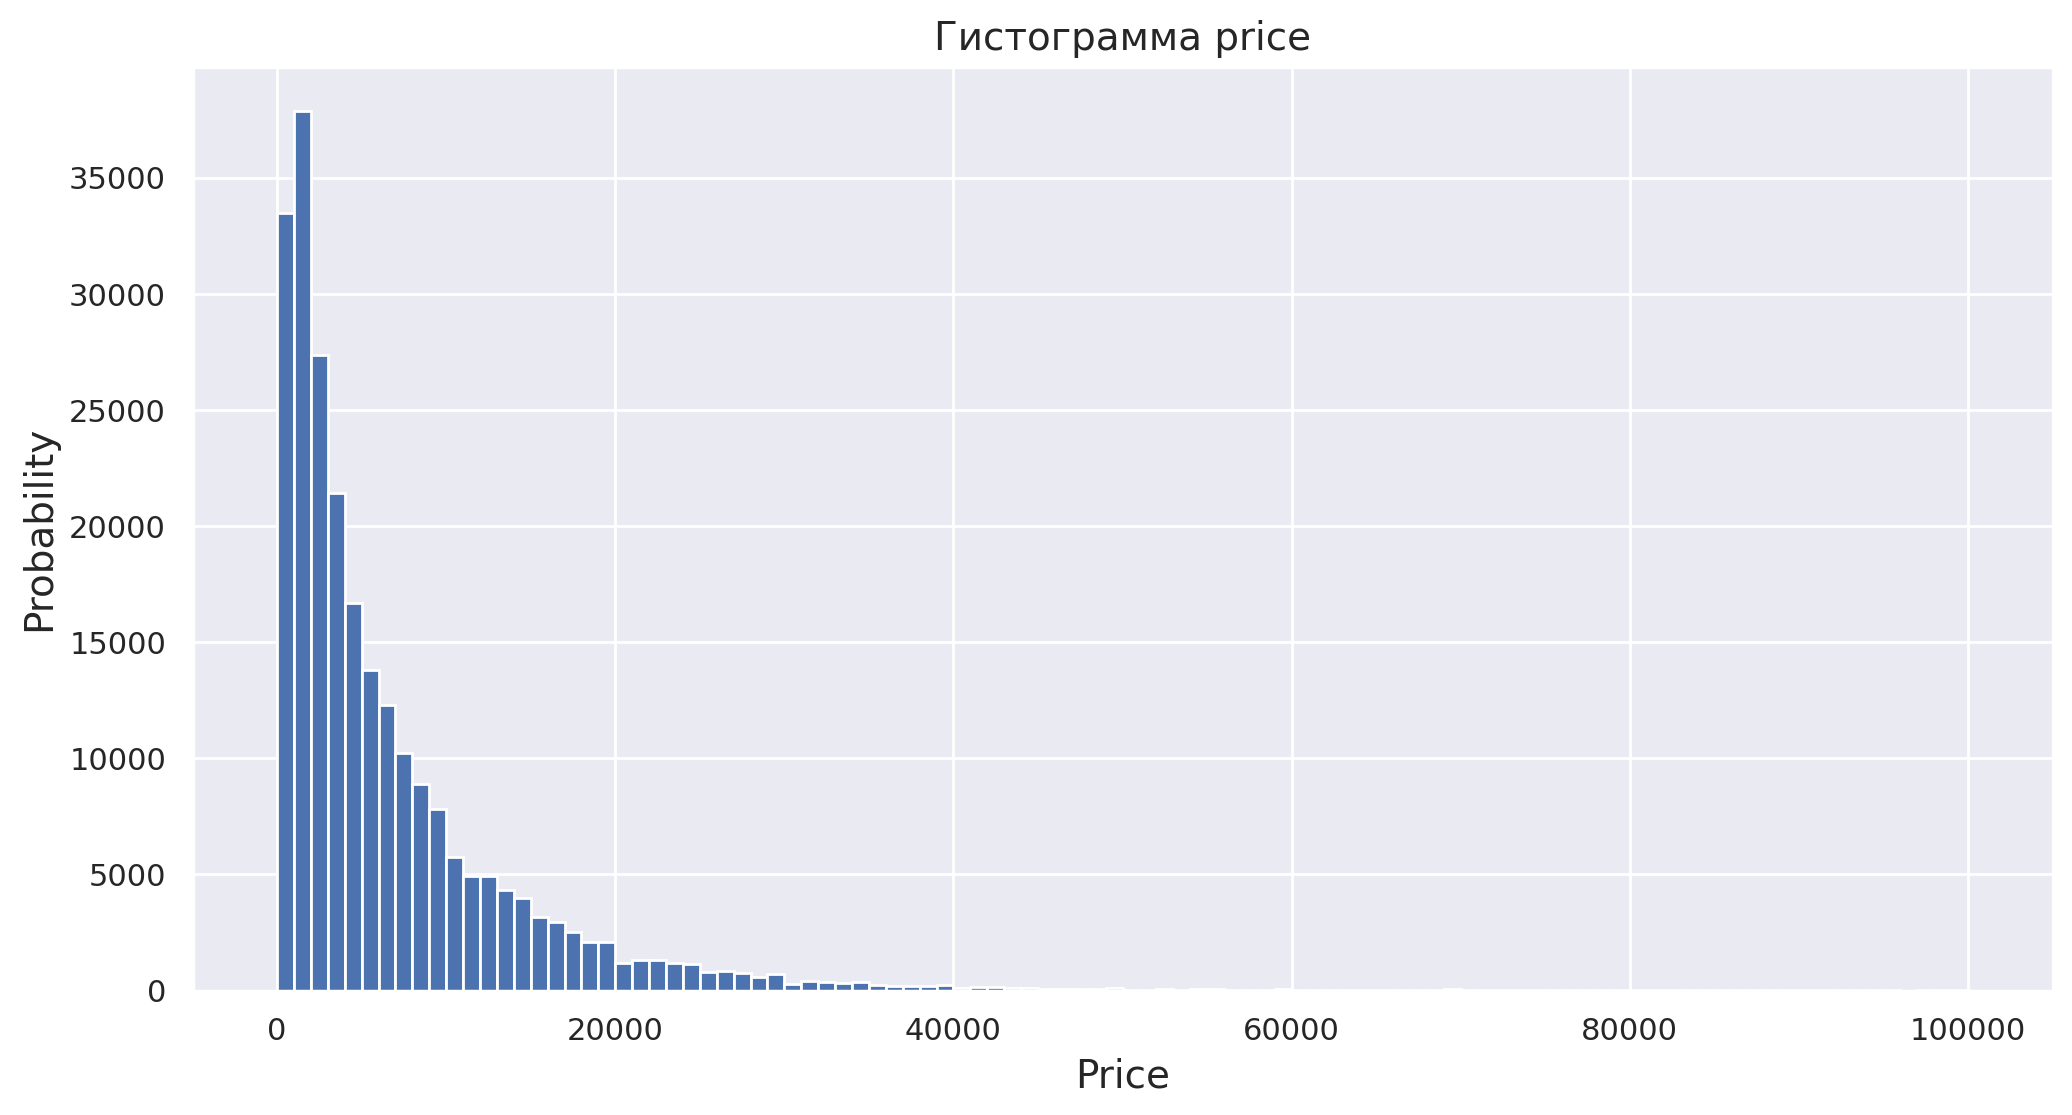

In [ ]:
%config InlineBackend.figure_format = 'retina'
data.hist(column='price', figsize=(12, 6), bins=100)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Гистограмма price', fontsize=14)
plt.show()

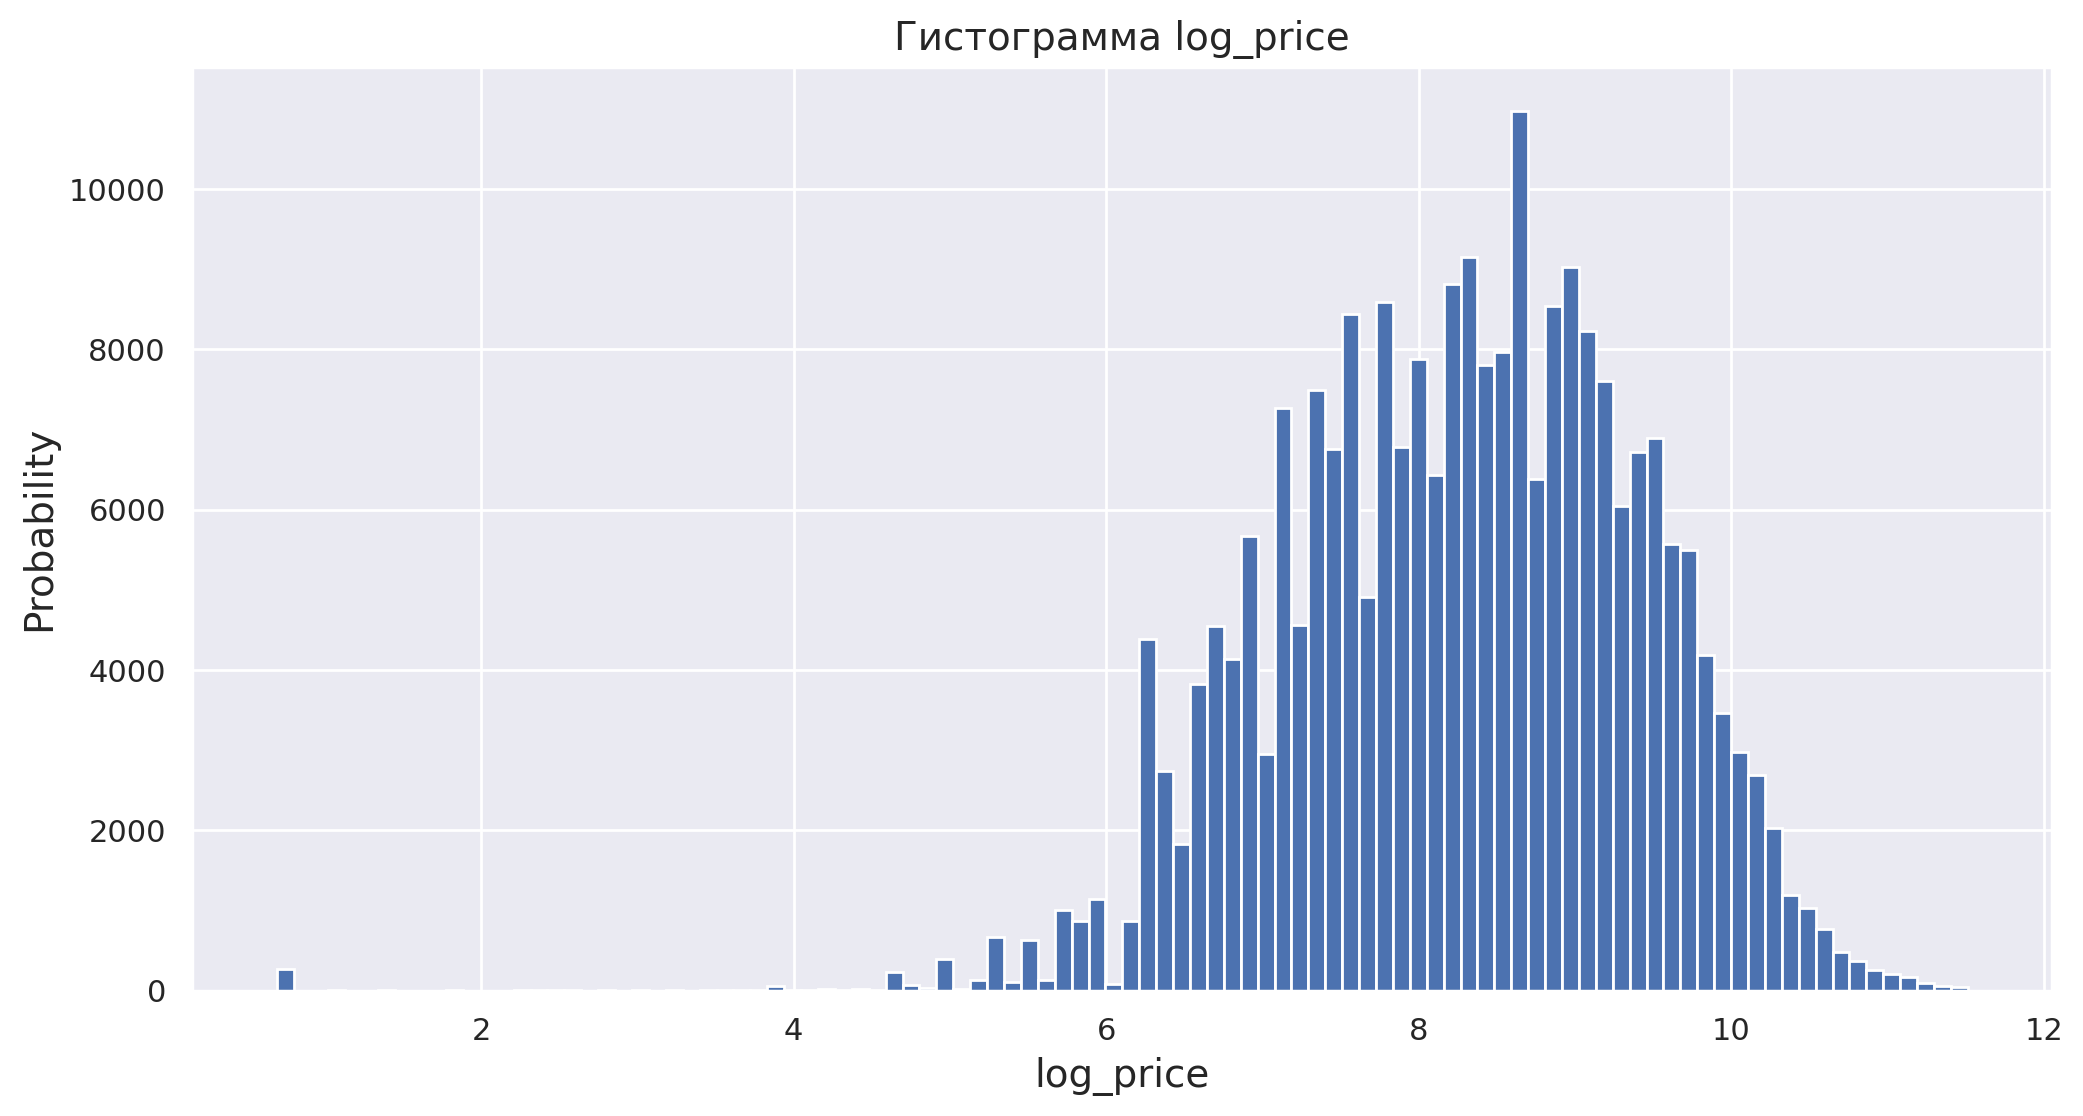

In [ ]:
np.log1p(data['price']).hist(figsize=(12, 6), bins=100)
plt.xlabel('log_price', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Гистограмма log_price', fontsize=14)
plt.show()

Логарифмирование целевой переменной позволило приблизиться к распределению более-менее напоминающему нормальное и уйти от правосторонней ассиметрии, кроме того, стали четко видны выбросы, поэтому, мне кажется, имеет смысл применить логарифмическое преобразование

In [ ]:
data['log_price'] = np.log1p(data['price'])
print(data[(data['log_price'] <= 4) | (data['price'] > 30000)].shape[0])
data = data[(data['log_price'] >= 4) & (data['price'] <= 30000)]

5041


По правилу трех сигм к выбросам стоит отнести объекты,у которых цена больше 29147.4 (примерно). Посмотрим на типы столбцов, описательные статистики и проверим, есть ли пропуски.

In [ ]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS              float64
kilometer            float64
autoAgeMonths        float64
price                float64
log_price            float64
dtype: object

Итак, у нас 6 столбцов, содержащих строчки, 5 с числами

In [ ]:
data.isna().sum()

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
log_price            0
dtype: int64

Пропусков нет

In [ ]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price,log_price
count,236143.000000,236143.000000,236143.000000,236143.000000,236143.000000
mean,128.528091,124994.579556,146.151019,6188.775835,8.229775
std,56.237952,38745.957453,71.709654,6038.685328,1.081248
min,51.000000,0.000000,1.000000,55.000000,4.025352
25%,90.000000,100000.000000,94.000000,1750.000000,7.467942
50%,116.000000,150000.000000,141.000000,3999.000000,8.294050
75%,155.000000,150000.000000,193.000000,8600.000000,9.059634
max,585.000000,150000.000000,600.000000,30000.000000,10.308986


Посмотрим на число уникальных значений в каждом столбце (поможет лучше понять, как интерпретировать каждый признак)

In [ ]:
for c in data.columns:
    print('column', c, '(type', data[c].dtype, ') has', data[c].nunique(), 'unique values', '\n')

column brand (type object ) has 38 unique values 

column model (type object ) has 248 unique values 

column vehicleType (type object ) has 8 unique values 

column gearbox (type object ) has 2 unique values 

column fuelType (type object ) has 7 unique values 

column notRepairedDamage (type object ) has 2 unique values 

column powerPS (type float64 ) has 381 unique values 

column kilometer (type float64 ) has 14 unique values 

column autoAgeMonths (type float64 ) has 590 unique values 

column price (type float64 ) has 3960 unique values 

column log_price (type float64 ) has 3960 unique values 



Скорее всего, в качестве категориальных стоит рассматривать: brand, model, vehicleType, gearbox, fuelType, notRepairedDamage (имеют строковый тип, об отношении порядка между значениями каждого из этих признаков говорить бессмысленно (т.е. не являются порядковыми)), в качестве вещественных:  powerPS, kilometer, autoAgeMonths.

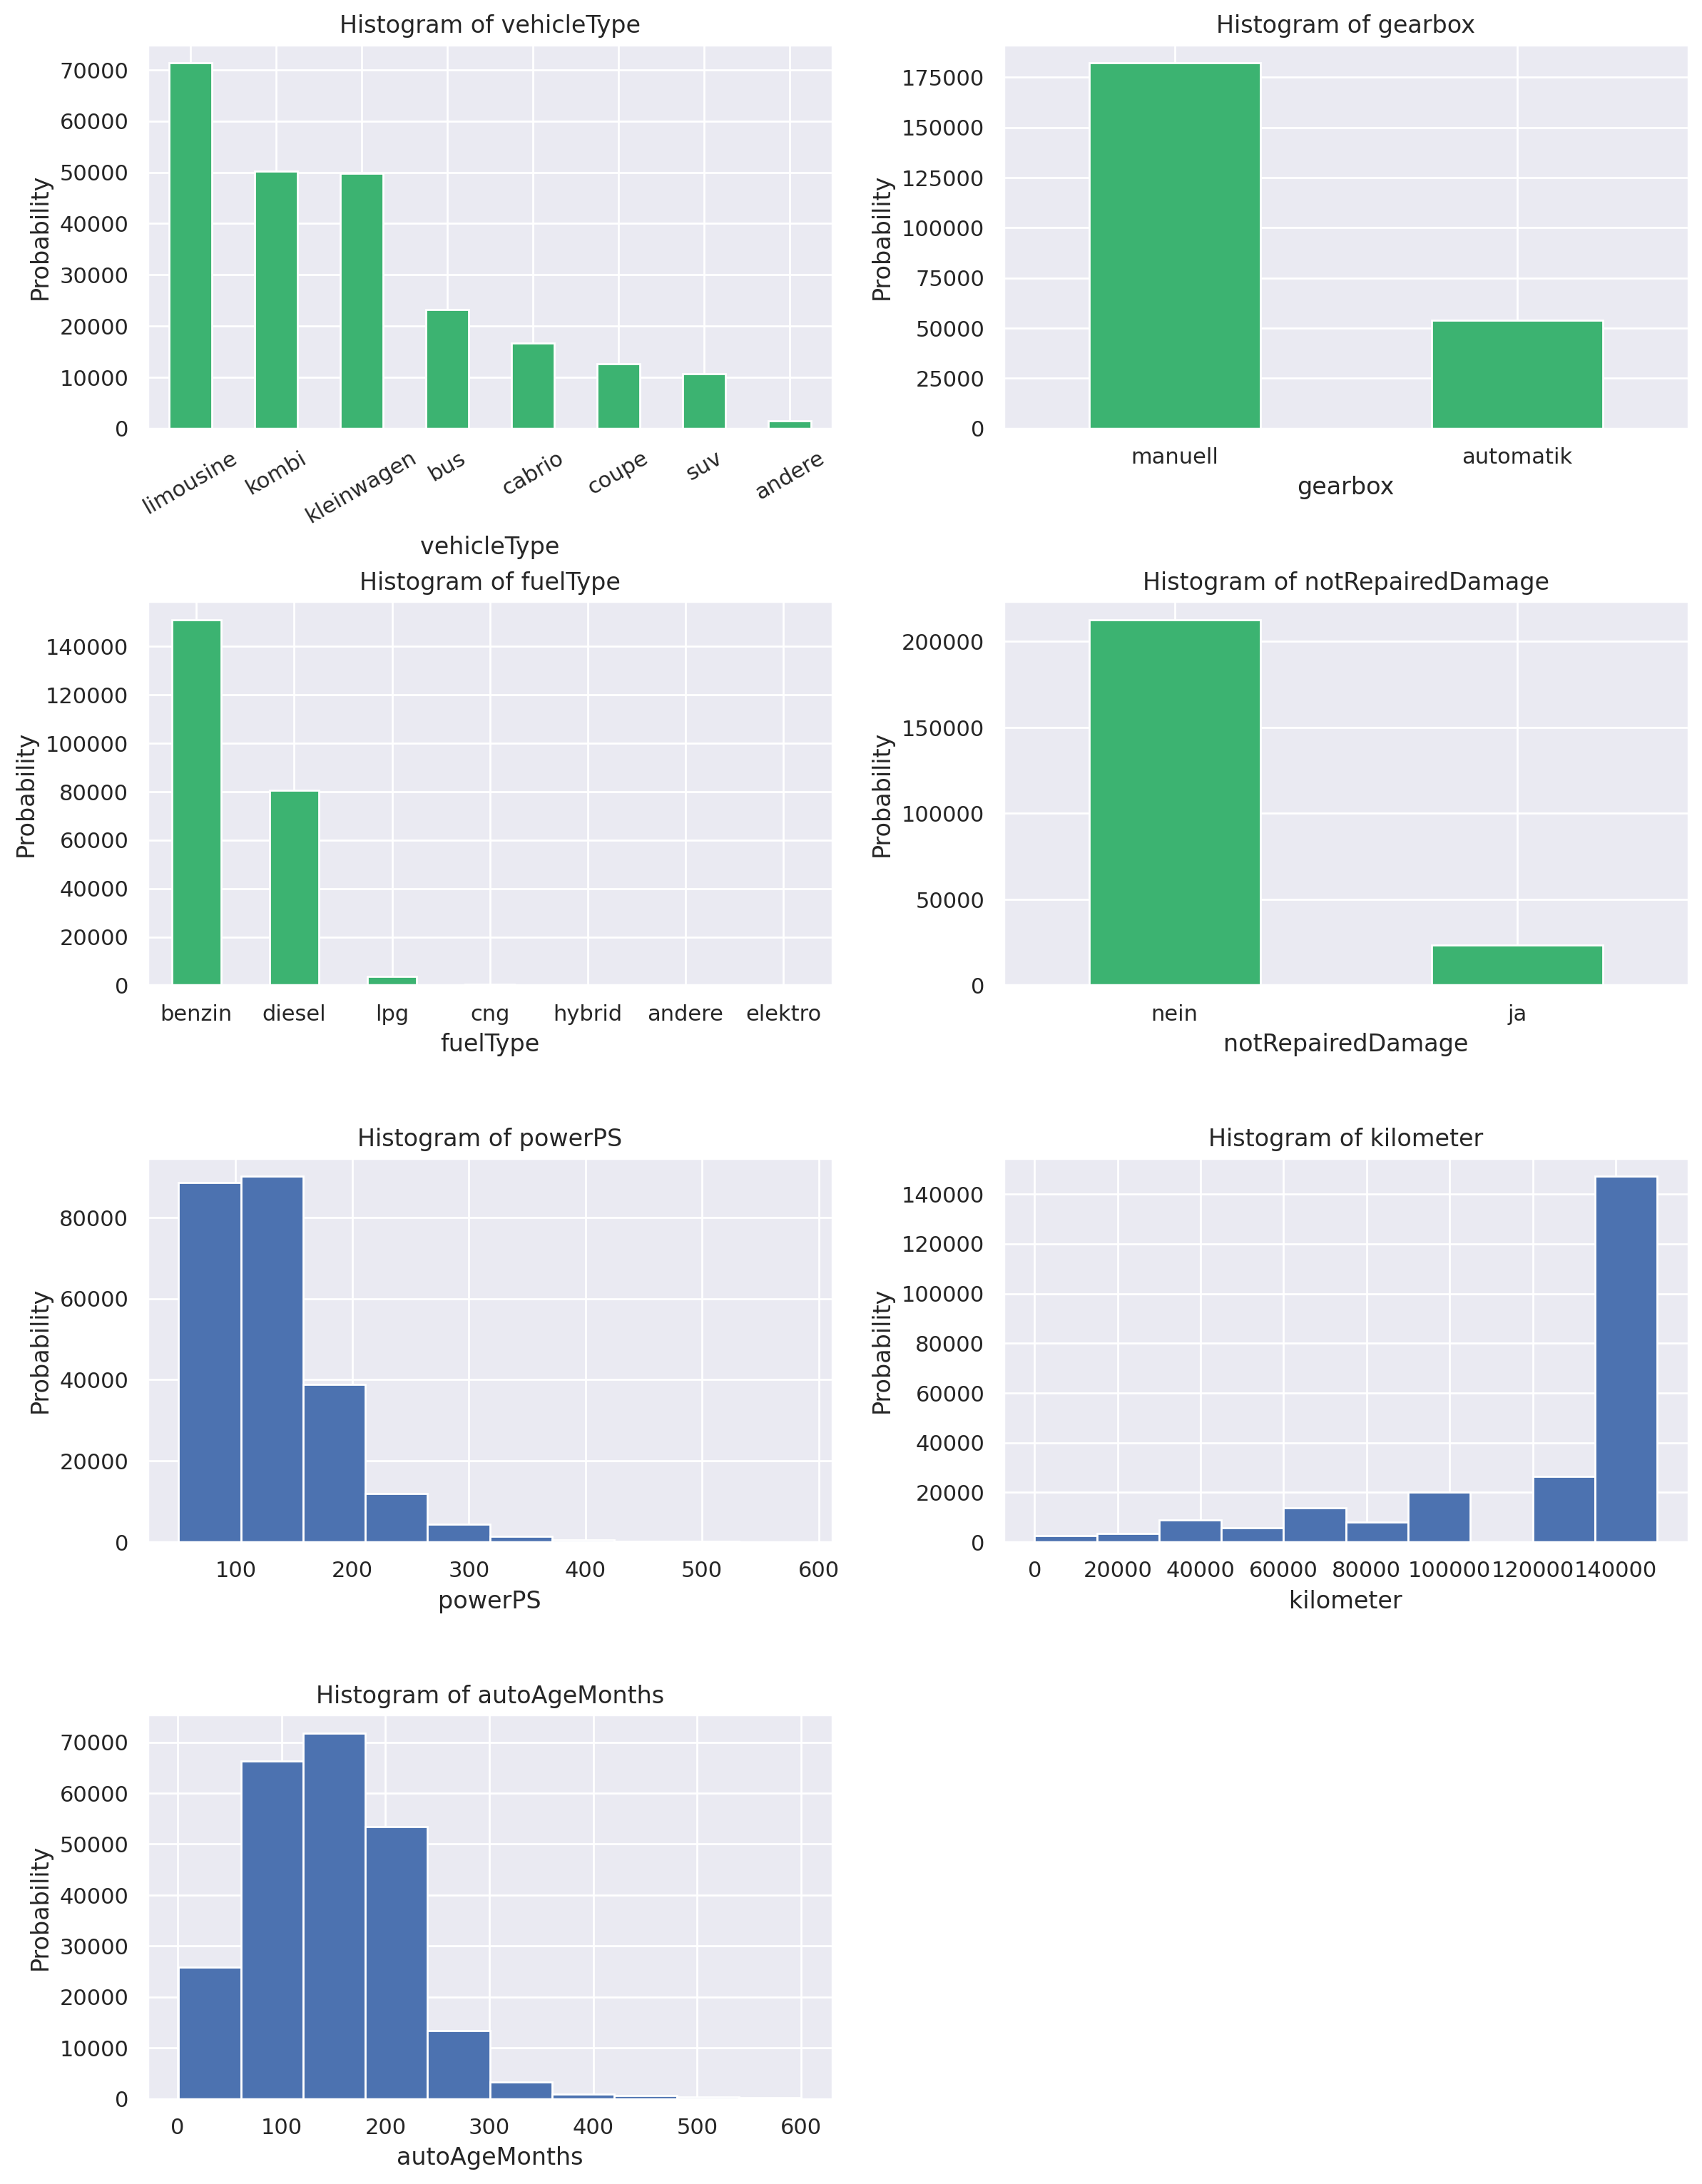

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(12, 16))
col_l = np.roll(np.delete(np.array(data.columns[:-2]), 1), -1).reshape(4,2)
ax[-1, -1].axis('off')
for i in range(4):
    for j in range(2):
        if 0 <= i <= 1:
            data.groupby(col_l[i,j])['price'].count().sort_values(ascending=False).plot(kind='bar', ax=ax[i,j], rot=0, color='mediumseagreen')
        else:
            if i==3 and j ==1:
                break
            ax[i,j].hist(data[col_l[i,j]])
        ax[i,j].set_title("Histogram of %s" % col_l[i,j])
        ax[i,j].set_xlabel("%s" % col_l[i,j])
        ax[i,j].set_ylabel("Probability")
        if i==0 and j ==0:
            ax[i,j].tick_params(axis='x', labelrotation=30)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.95,
                    hspace=0.45, wspace=0.25)

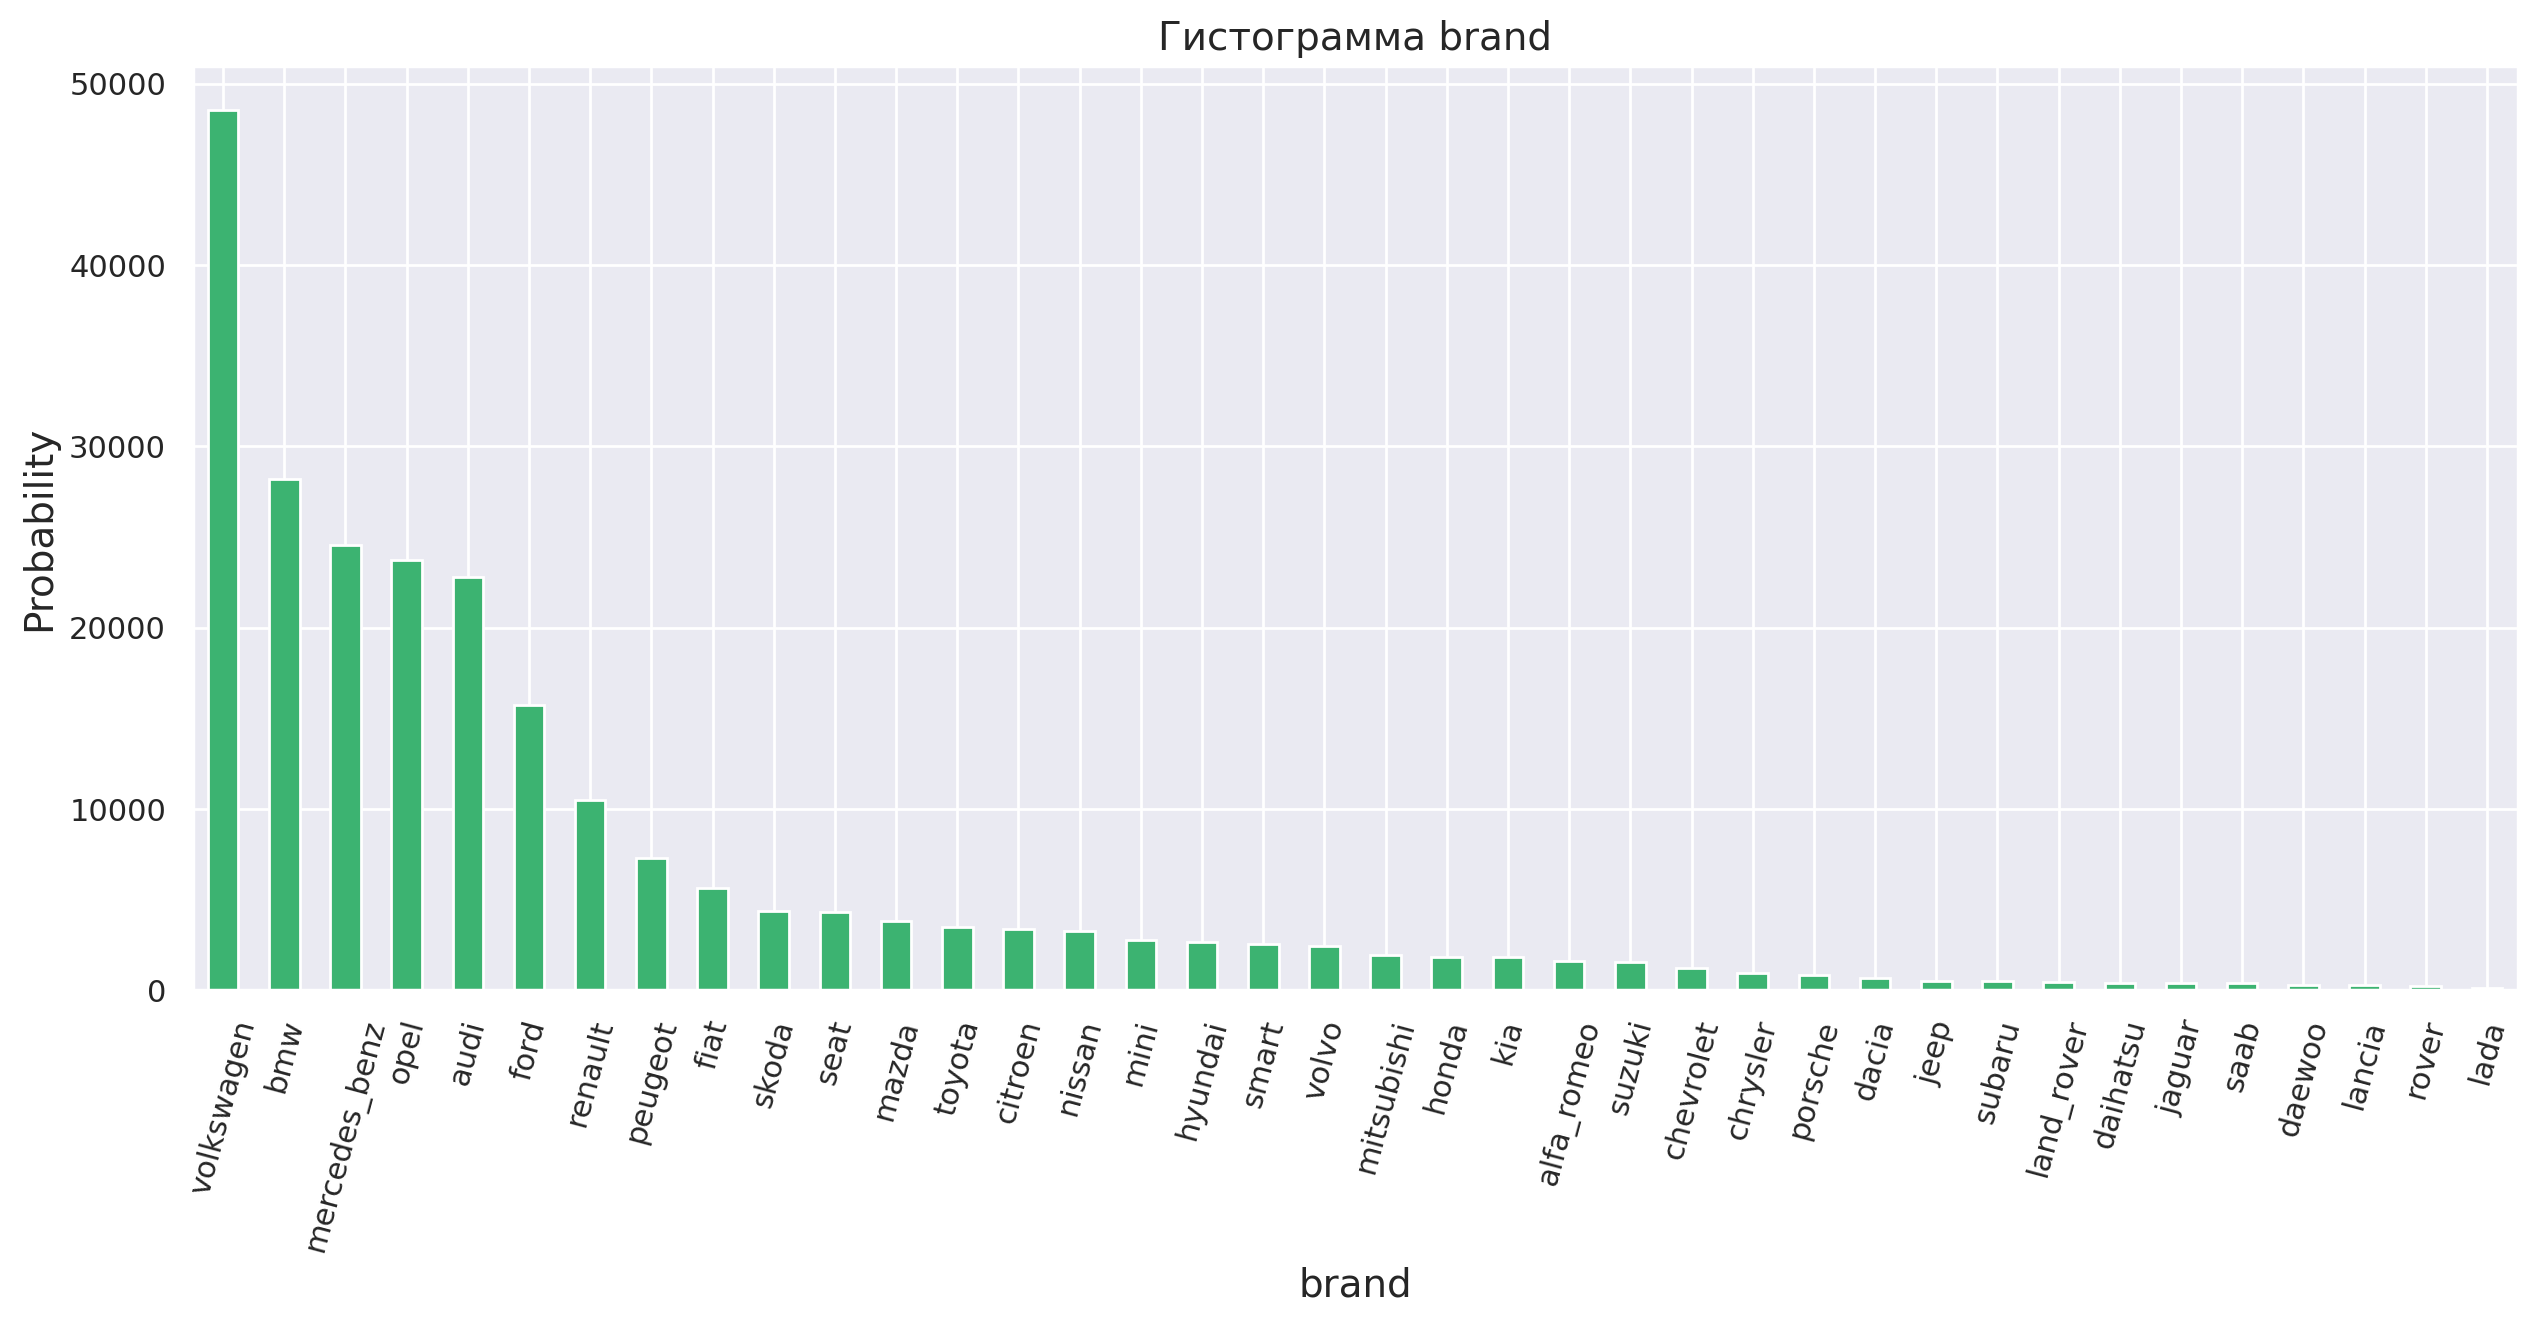

In [ ]:
data.groupby('brand')['price'].count().sort_values(ascending=False).plot(kind='bar', rot=75, color='mediumseagreen', figsize=(15, 6))
plt.xlabel('brand', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Гистограмма brand', fontsize=14)
plt.show()

Гистограмму для модели строить не имеет смысла, поскольку слишком много (почти 250) разных значений

In [ ]:
corrmat = data[['log_price', 'price', 'powerPS', 'kilometer', 'autoAgeMonths']].corr()
display(corrmat)

,log_price,price,powerPS,kilometer,autoAgeMonths
log_price,1.000000,0.864923,0.517245,-0.417774,-0.646965
price,0.864923,1.000000,0.543425,-0.462672,-0.586678
powerPS,0.517245,0.543425,1.000000,0.055228,-0.157205
kilometer,-0.417774,-0.462672,0.055228,1.000000,0.453909
autoAgeMonths,-0.646965,-0.586678,-0.157205,0.453909,1.000000


В принципе, коэффициенты корреляции для всех трех вещественных переменных указывают на наличие средней-сильной взаимосвязи между log_price и этими независимыми переменными

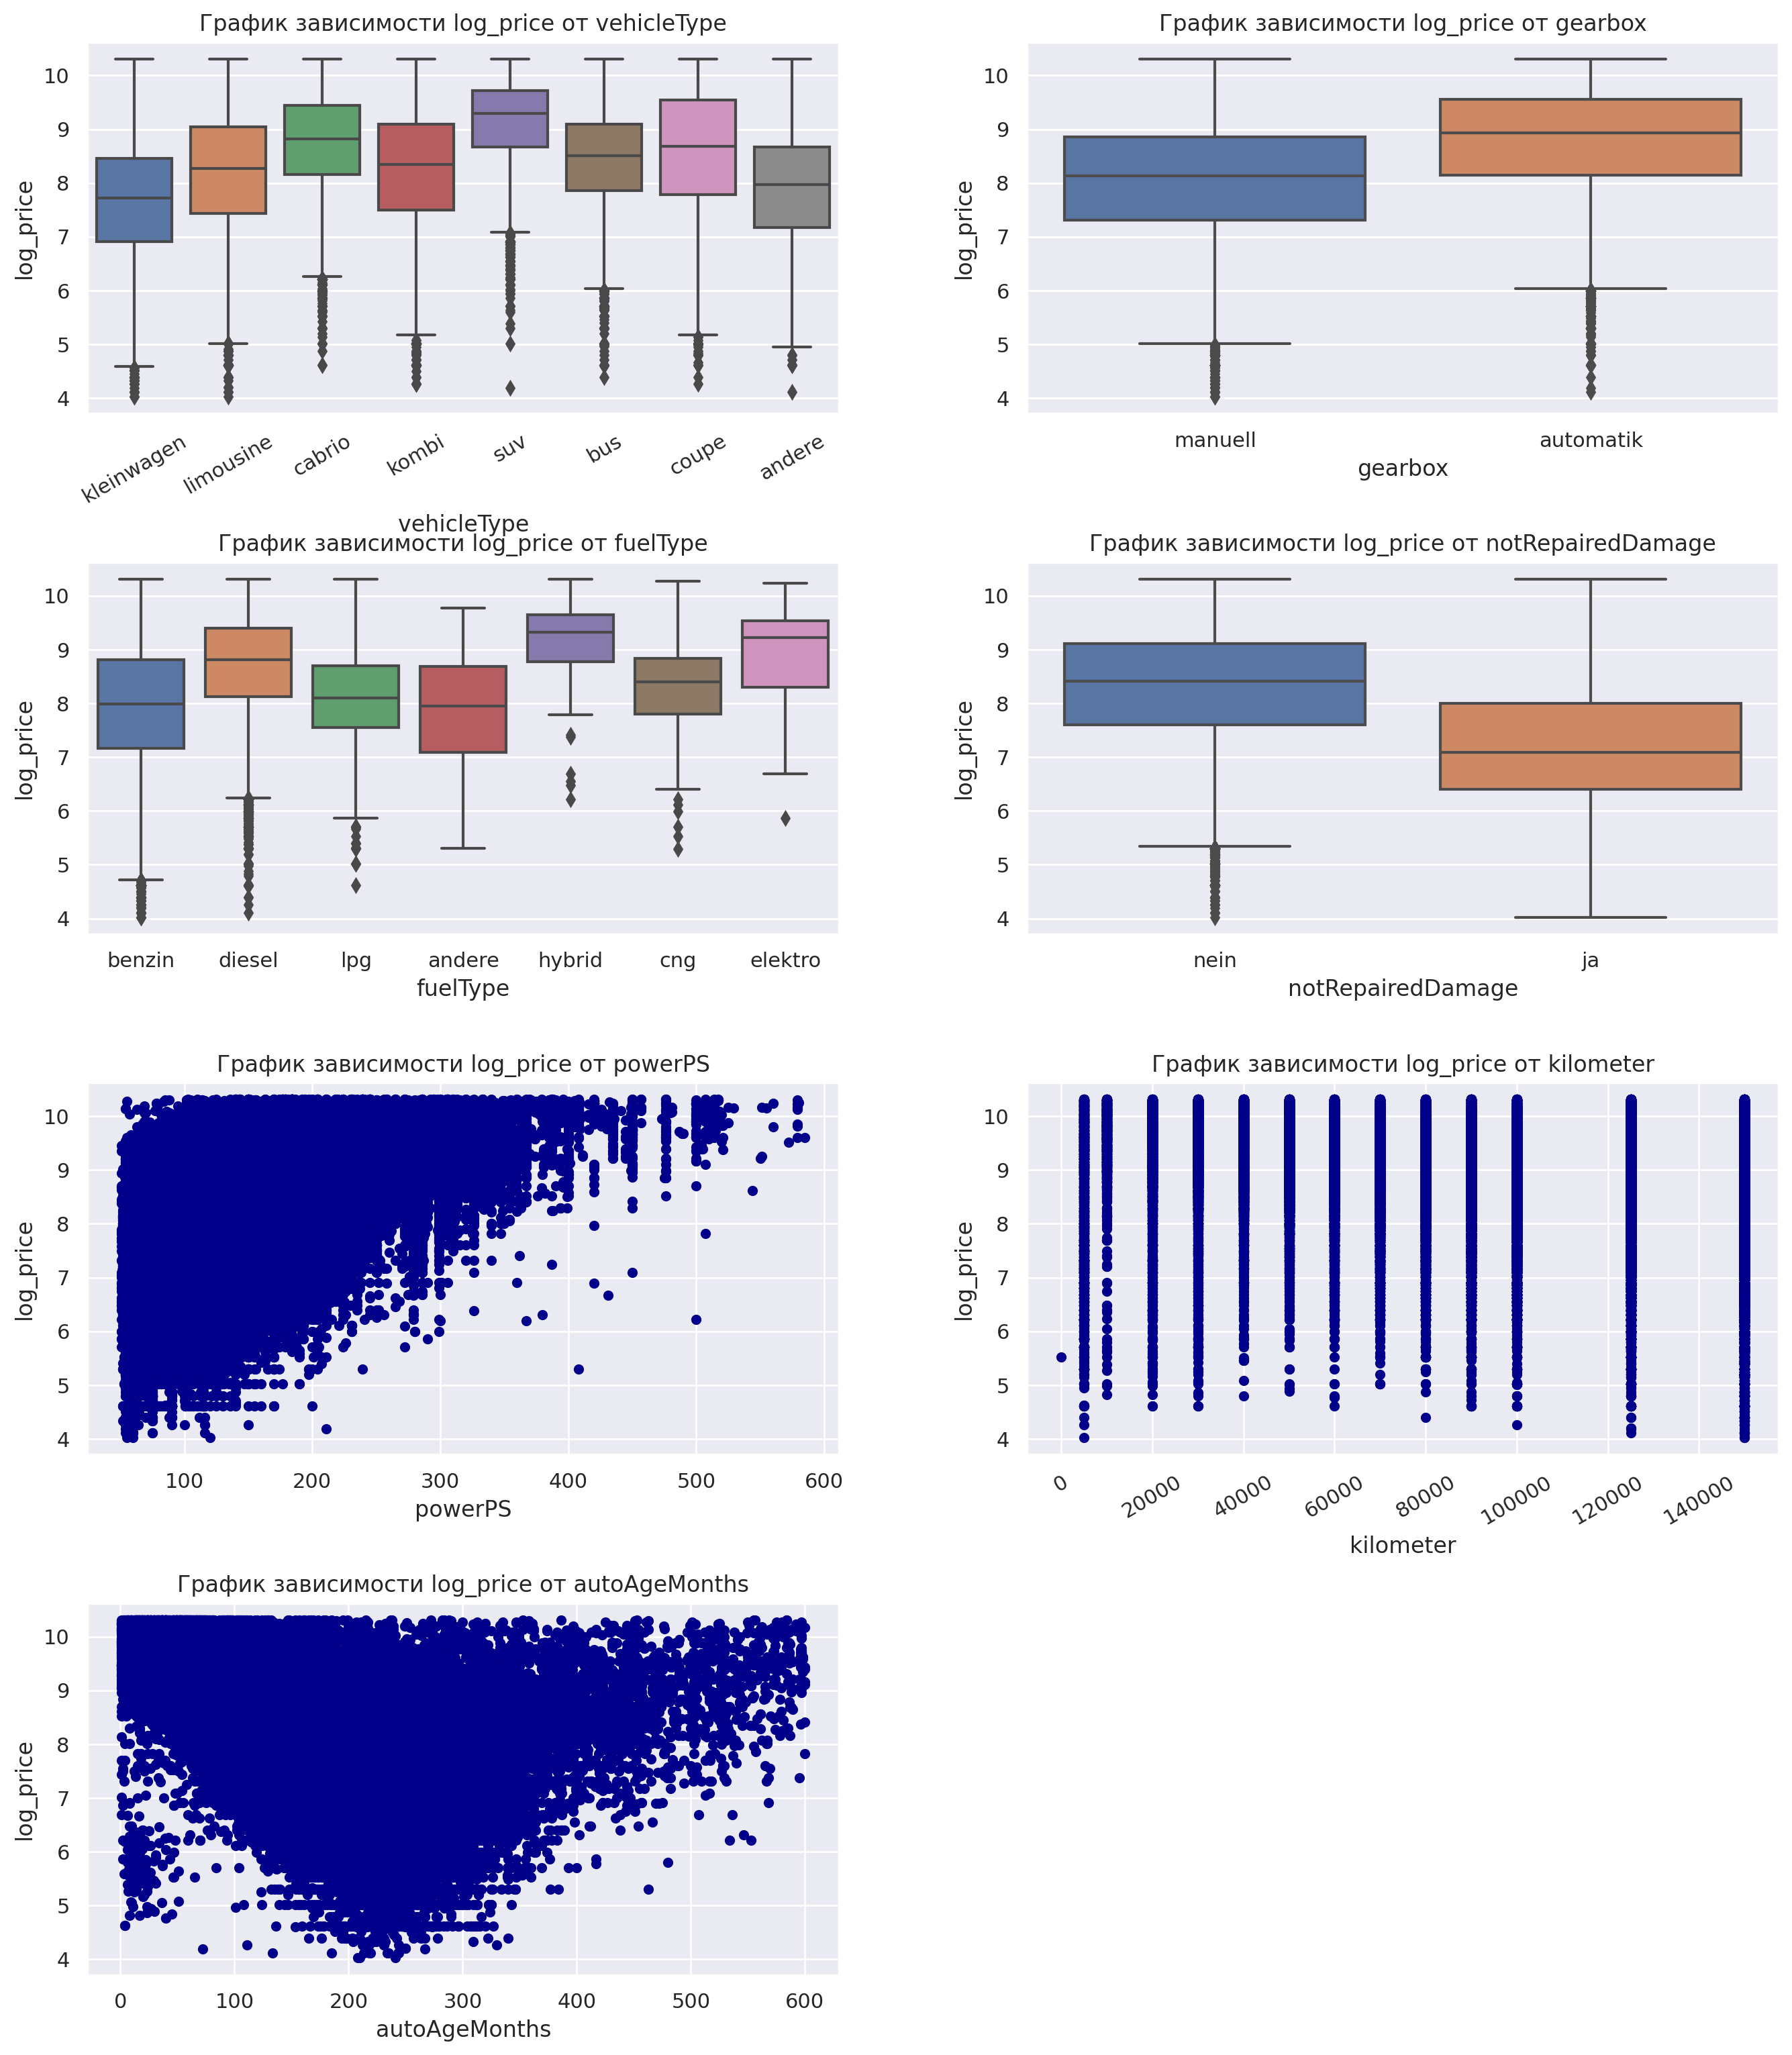

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(14, 16))
ax[-1, -1].axis('off')
for i in range(4):
    for j in range(2):
        if i==3 and j ==1:
                break
        elif i <= 1:
            sns.boxplot(x=col_l[i,j], y='log_price', data=data, ax=ax[i,j])
        else:
            data.plot(x=col_l[i,j], y='log_price', kind='scatter', ax=ax[i,j], rot=0, c='DarkBlue')
        ax[i,j].set_title("График зависимости log_price от %s" % col_l[i,j])
        ax[i,j].set_xlabel("%s" % col_l[i,j])
        ax[i,j].set_ylabel("log_price")
        if i==0 and j ==0 or i == 2 and j == 1:
            ax[i,j].tick_params(axis='x', labelrotation=30)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.95,
                    hspace=0.4, wspace=0.25)

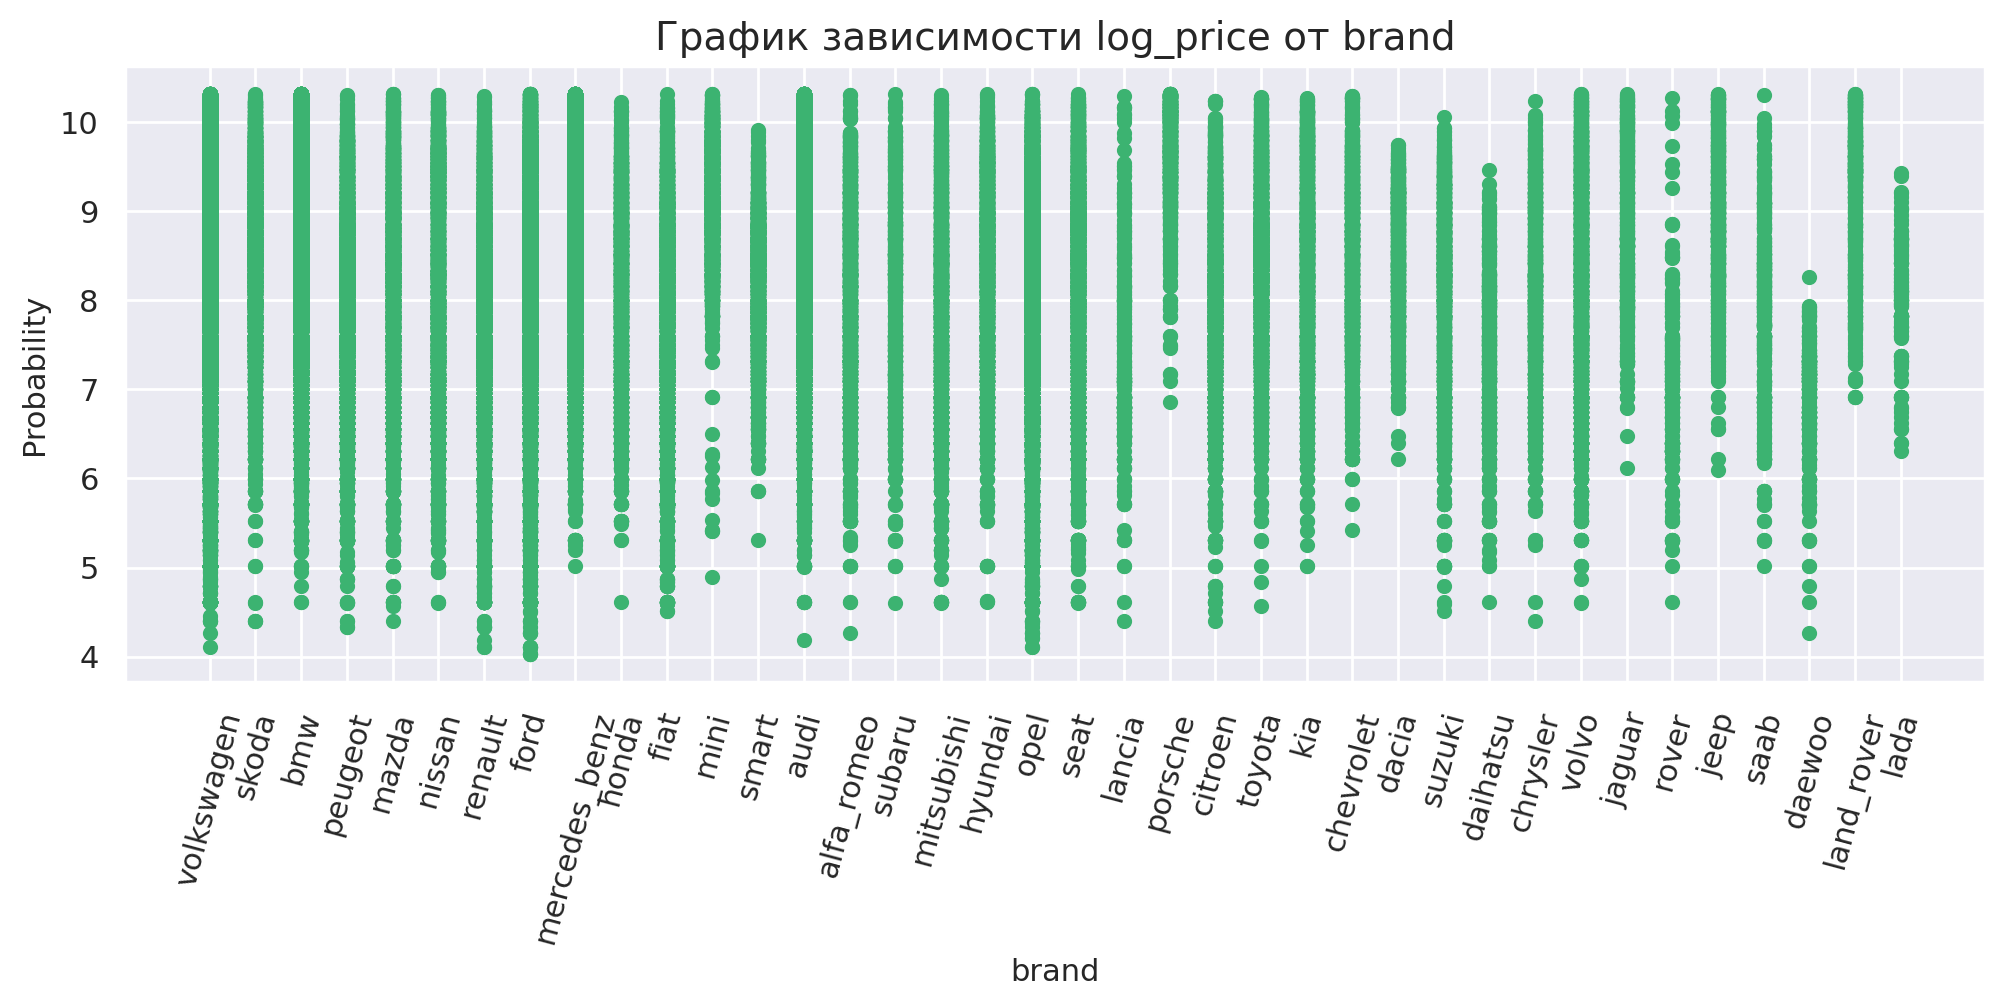

In [ ]:
data.plot(x='brand', y='log_price', kind='scatter', rot=75, color='mediumseagreen', figsize=(12, 4))
plt.xlabel('brand', fontsize=11)
plt.ylabel('Probability', fontsize=11)
plt.title('График зависимости log_price от brand', fontsize=14)
plt.show()

In [ ]:
data['is_auto_gearbox'] = data['gearbox'].apply(lambda x: 1 if x == 'automatik' else 0)
data.drop('gearbox', axis=1, inplace=True)
data['notRepairedDamage'] = data['notRepairedDamage'].apply(lambda x: 1 if x == 'ja' else 0)
data = data[data['autoAgeMonths'] <= 500] # из графика видно, что после 500 много точек выбиваются из кластера,
                                          # кроме того, можно посмотреть на гистограмму

In [ ]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType']
numeric = ['powerPS', 'autoAgeMonths']
other = ['is_auto_gearbox', 'notRepairedDamage']

In [ ]:
x = data[categorical + numeric + other].copy()
x['bias'] = 1
other += ['bias']
y = data['log_price']
x

,brand,model,vehicleType,fuelType,powerPS,autoAgeMonths,is_auto_gearbox,notRepairedDamage,bias
0,volkswagen,golf,kleinwagen,benzin,75.0,177.0,0,0,1
1,skoda,fabia,kleinwagen,diesel,69.0,93.0,0,0,1
2,bmw,3er,limousine,benzin,102.0,246.0,0,1,1
3,peugeot,2_reihe,cabrio,benzin,109.0,140.0,0,0,1
4,mazda,3_reihe,limousine,benzin,105.0,136.0,0,0,1
...,...,...,...,...,...,...,...,...,...
241181,volkswagen,golf,limousine,diesel,140.0,69.0,0,0,1
241182,seat,leon,limousine,benzin,225.0,142.0,0,1,1
241183,smart,fortwo,cabrio,benzin,101.0,192.0,1,0,1
241184,volkswagen,transporter,bus,diesel,102.0,241.0,0,0,1


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=30)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

lambda_ = np.logspace(-4, 1, 5)
dimension = x_train.shape[1]
table_df = pd.DataFrame(columns=['method', 'lambda', 'mse_validation', 'mse_train', 'mse_test', 'val_r2', 'train_r2', 'test_r2', 'iters_to_conv'])


for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    for l in lambda_:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': dimension,
                'lambda_': l
            }
        }
        regression = LinearRegression().fit(x_train.toarray(), y_train.to_numpy())
        iters_to_conv = regression##.descent.lr.iteration

        y_val_pred = regression.predict(x_val.toarray())
        y_train_pred = regression.predict(x_train.toarray())
        y_test_pred = regression.predict(x_test.toarray())

        val_mse = mean_squared_error(y_val_pred, y_val, squared=True)
        train_mse = mean_squared_error(y_train_pred, y_train, squared=True)
        test_mse = mean_squared_error(y_test_pred, y_test, squared=True)

        val_r2 = r2_score(y_val, y_val_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        d = {'method' : descent_name, 'lambda' : l, 'mse_validation' : val_mse,
             'mse_train' : train_mse, 'mse_test' : test_mse, 'val_r2' : val_r2,
             'train_r2' : train_r2, 'test_r2' : test_r2, 'iters_to_conv' : iters_to_conv}
        table_df = table_df.append(d, ignore_index=True)


table_df

<ipython-input-82-789d46ab1315>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(d, ignore_index=True)
<ipython-input-82-789d46ab1315>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(d, ignore_index=True)
<ipython-input-82-789d46ab1315>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(d, ignore_index=True)
<ipython-input-82-789d46ab1315>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(d, ignore_index=True)
<ipython-input-82-789d46ab1315>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas

,method,lambda,mse_validation,mse_train,mse_test,val_r2,train_r2,test_r2,iters_to_conv
0,full,0.000100,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
1,full,0.001778,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
2,full,0.031623,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
3,full,0.562341,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
4,full,10.000000,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
5,stochastic,0.000100,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
6,stochastic,0.001778,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
7,stochastic,0.031623,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
8,stochastic,0.562341,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
9,stochastic,10.000000,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()


In [ ]:
mv_min = table_df.groupby('method')[['mse_validation']].min()
print('Наилучшая длина шага для каждого метода с точки зрения ошибки')
opt_lambd_df = table_df[table_df['mse_validation'].isin(mv_min['mse_validation'])]
opt_lambd_df

Наилучшая длина шага для каждого метода с точки зрения ошибки


,method,lambda,mse_validation,mse_train,mse_test,val_r2,train_r2,test_r2,iters_to_conv
0,full,0.000100,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
1,full,0.001778,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
2,full,0.031623,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
3,full,0.562341,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
4,full,10.000000,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
5,stochastic,0.000100,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
6,stochastic,0.001778,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
7,stochastic,0.031623,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
8,stochastic,0.562341,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
9,stochastic,10.000000,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()


### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [ ]:
err_iter_df = pd.DataFrame(columns=['method', 'iter', 'loss_on_iter'])

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config = {
    'descent_name': descent_name,
    'kwargs': {
        'dimension': dimension,
        'lambda_': opt_lambd_df.loc[opt_lambd_df['method'] == descent_name, 'lambda'].values[0]
    }
}
    regression = LinearRegression().fit(x_train.toarray(), y_train.to_numpy())

    for it, err in enumerate(regression.loss_history):
        d = {'method' : descent_name, 'iter': it, 'loss_on_iter' : err}
        err_iter_df = err_iter_df.append(d, ignore_index=True)

err_iter_df

In [ ]:
ax = sns.relplot(data=err_iter_df, x='iter', y='loss_on_iter', hue='method', kind='line', height=6, aspect=8/6)
ax.set_axis_labels('Номер итерации', 'Ошибка на итерации')
ax.fig.suptitle('Зависимость ошибки от номера итерации')
plt.subplots_adjust(top=0.95)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from descents import BaseDescent

w0 =  np.zeros(404) #после ohe


categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage','yearOfRegistration', 'monthOfRegistration']
numeric_features = ['powerPS', 'kilometer']

reg = LinearRegression(descent = BaseDescent(x, lambda_ = 2.5))

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', reg)
])


model = pipeline.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Test R^2 = %.4f" % r2_score(y_test, y_pred))

TypeError: ignored

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
import time
batch_sizes = np.arange(5, 500, 10)
k=5
mean_conv_time_dict = {}
mean_iter_dict = {}

for b_size in batch_sizes:
    time_lst = []
    iter_lst = []
    for _ in range(k):

        descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension' : dimension,
            #'lambda_' : 0.5,
            'batch_size' : b_size
        }
    }
        regression = LinearRegression(descent_config=descent_config)
        tic = time.perf_counter()
        regression.fit(x_train.toarray(), y_train.to_numpy())
        toc = time.perf_counter()
        time_to_conv = toc - tic
        iters_to_conv = regression.descent.lr.iteration
        time_lst.append(time_to_conv)
        iter_lst.append(iters_to_conv)

    mean_conv_time_dict[b_size] = sum(time_lst) / k
    mean_iter_dict[b_size] = sum(iter_lst) / k

In [ ]:
iter_plot_list = sorted(mean_iter_dict.items())
x, y = zip(*iter_plot_list)
plt.figure(figsize=(15, 8))
plt.xlabel('batch size', fontsize=14)
plt.ylabel('Число итераций до сходимости', fontsize=14)
plt.title('График зависимости числа итераций до сходимости от размера батча', fontsize=14)
plt.plot(x, y)
plt.show()

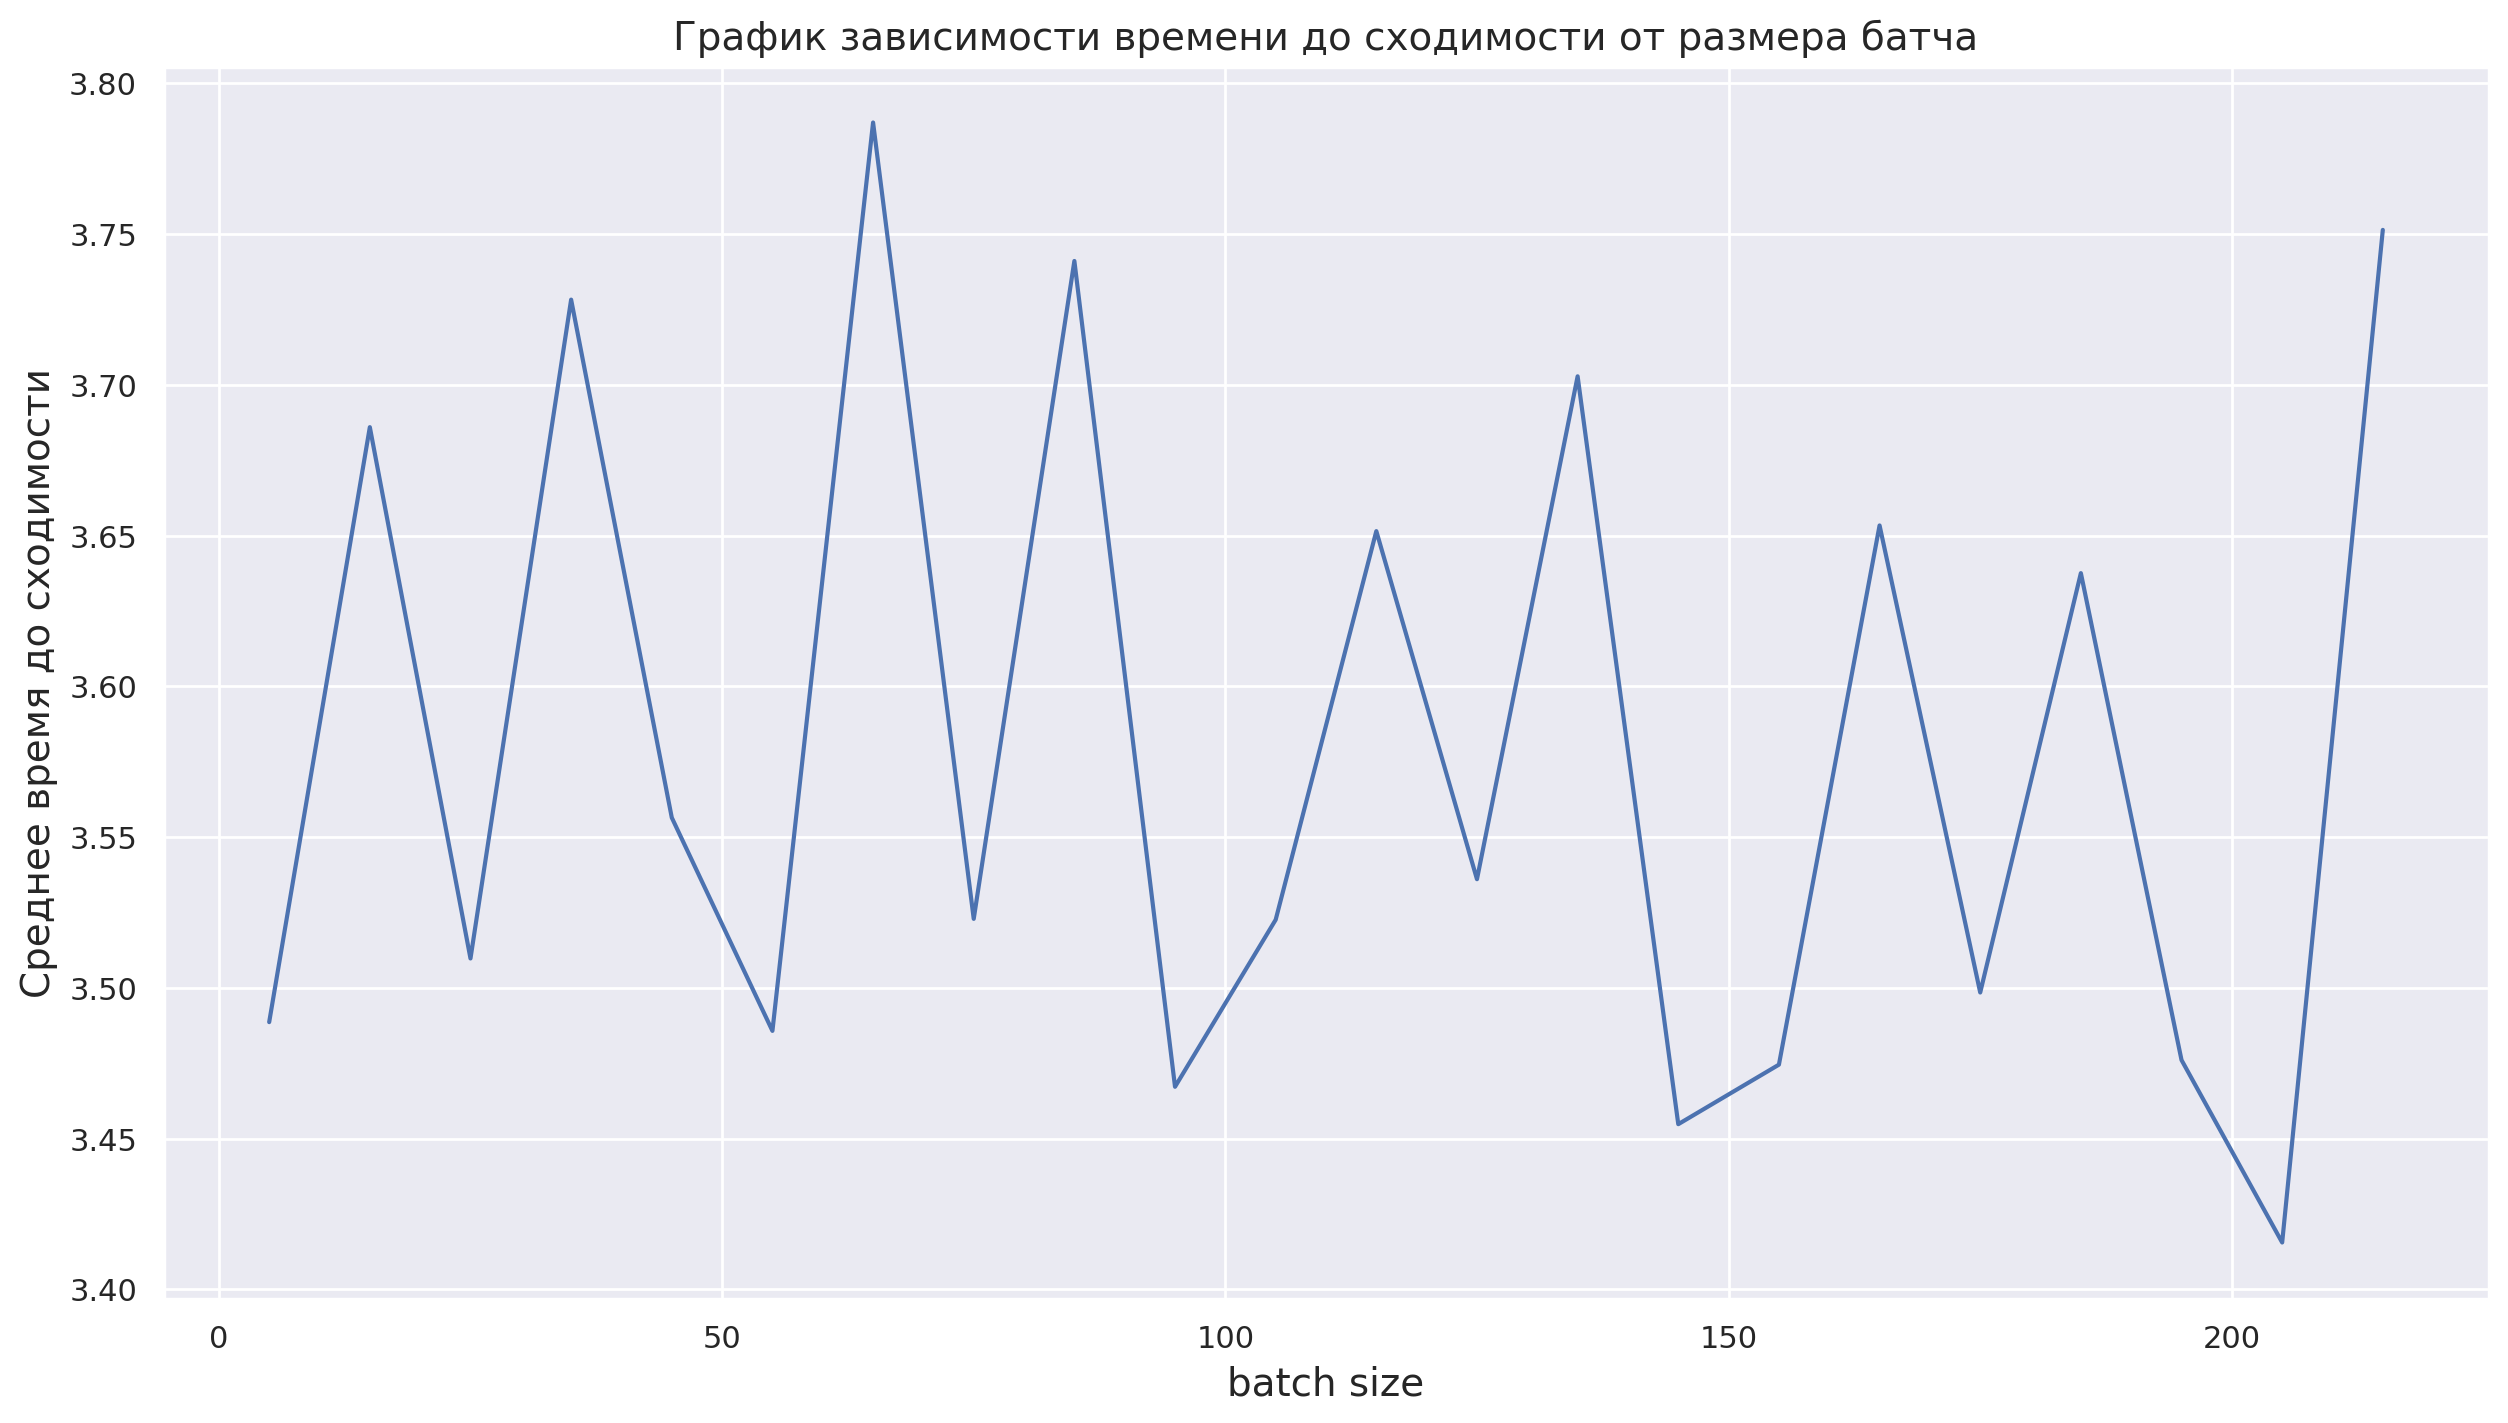

In [ ]:
time_plot_list = sorted(mean_conv_time_dict.items())
x, y = zip(*time_plot_list)
plt.figure(figsize=(15, 8))
plt.xlabel('batch size', fontsize=14)
plt.ylabel('Среднее время до сходимости', fontsize=14)
plt.title('График зависимости времени до сходимости от размера батча', fontsize=14)
plt.plot(x, y)
plt.show()

NB Судя по всему лямбда,стоящая по умолчанию ($10^{-3}$), слишком мала, и шаг очень мало меняет веса, поэтому происходит очень быстрая остановка (на 2-3 итерации) по критерию tolerance, поэтому получались такие результаты: число итераций в районе двух, и время сходимости небольшое. Это не очень информативно, но возможно имеет смысл увеличить лямбду до примерно найденной ранее оптимальной (закоментил это в descent_config, у меня очень долго отрабатывала программа с такой лямбдой, но если компьютер помощнее,то можно попробовать. Прогнозирую, что должна быть следующая картина: с увеличением размера батча должно сходиться за меньшее число итераций).

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/29933/run-report/55398799/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
lambdas_ = np.logspace(-4, 1, 5)
mus_ = np.logspace(-4, 0, 5)
dimension = x_train.shape[1]
mu_lamd_df = pd.DataFrame(columns=['method', 'lambda', 'mu', 'mse_validation', 'mse_train', 'mse_test', 'val_r2', 'train_r2', 'test_r2', 'iters_to_conv'])

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    for l in lambdas_:
        for mu in mus_:
            descent_config = {
                'descent_name': descent_name,
                'regularized': True,
                'kwargs': {
                    'dimension': dimension,
                    'lambda_': l,
                    'mu': mu
                }
            }
            regression = LinearRegression().fit(x_train.toarray(), y_train.to_numpy())
          ##  iters_to_conv = regression.iteration

            y_val_pred = regression.predict(x_val.toarray())
            y_train_pred = regression.predict(x_train.toarray())
            y_test_pred = regression.predict(x_test.toarray())

            val_mse = mean_squared_error(y_val_pred, y_val, squared=True)
            train_mse = mean_squared_error(y_train_pred, y_train, squared=True)
            test_mse = mean_squared_error(y_test_pred, y_test, squared=True)

            val_r2 = r2_score(y_val, y_val_pred)
            train_r2 = r2_score(y_train, y_train_pred)
            test_r2 = r2_score(y_test, y_test_pred)

            d = {'method' : descent_name, 'lambda' : l, 'mu' : mu, 'mse_validation' : val_mse,
                 'mse_train' : train_mse, 'mse_test' : test_mse, 'val_r2' : val_r2,
                 'train_r2' : train_r2, 'test_r2' : test_r2, 'iters_to_conv' : iters_to_conv}
            mu_lamd_df = mu_lamd_df.append(d, ignore_index=True)


mu_lamd_df

In [ ]:
mv_min_lm = mu_lamd_df.groupby('method')[['mse_validation']].min()
print('Наилучшая длина шага для каждого метода с точки зрения ошибки')
opt_lambd_df_lm = mu_lamd_df[mu_lamd_df['mse_validation'].isin(mv_min_lm['mse_validation'])]
opt_lambd_df_lm

Наилучшая длина шага для каждого метода с точки зрения ошибки


,method,lambda,mu,mse_validation,mse_train,mse_test,val_r2,train_r2,test_r2,iters_to_conv
0,full,0.0001,0.0001,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
1,full,0.0001,0.0010,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
2,full,0.0001,0.0100,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
3,full,0.0001,0.1000,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
4,full,0.0001,1.0000,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
...,...,...,...,...,...,...,...,...,...,...
95,adam,10.0000,0.0001,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
96,adam,10.0000,0.0010,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
97,adam,10.0000,0.0100,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()
98,adam,10.0000,0.1000,0.271977,0.262853,0.26528,0.765913,0.775527,0.770583,LinearRegression()


In [ ]:
err_iter_lm_df = pd.DataFrame(columns=['method', 'iter', 'loss_on_iter'])

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config = {
    'descent_name': descent_name,
    'regularized': True,
    'kwargs': {
        'dimension': dimension,
        'lambda_': opt_lambd_df_lm.loc[opt_lambd_df_lm['method'] == descent_name, 'lambda'].values[0],
        'mu': opt_lambd_df_lm.loc[opt_lambd_df_lm['method'] == descent_name, 'mu'].values[0]
    }
}
    regression = LinearRegression().fit(x_train.toarray(), y_train.to_numpy())

    for it, err in enumerate(regression.loss_history):
        d = {'method' : descent_name, 'iter': it, 'loss_on_iter' : err}
        err_iter_lm_df = err_iter_lm_df.append(d, ignore_index=True)

err_iter_lm_df

In [ ]:
def func_to_plot(descent_name, ax):
    x_arr1 = err_iter_df[err_iter_df['method'] == descent_name]['iter'].tolist()
    x_arr2 = err_iter_lm_df[err_iter_lm_df['method'] == descent_name]['iter'].tolist()

    y_arr1 = err_iter_df[err_iter_df['method'] == descent_name]['loss_on_iter'].tolist()
    y_arr2 = err_iter_lm_df[err_iter_lm_df['method'] == descent_name]['loss_on_iter'].tolist()


    ax.plot(x_arr1, y_arr1, label=descent_name)
    ax.plot(x_arr2, y_arr2, label='reg' + descent_name)
    ax.set_xlabel("Номер итерации")
    ax.set_ylabel("Ошибка на итерации")
    ax.legend()

fig, axs = plt.subplots(4,1, figsize=(12, 22))
plt.suptitle("Зависимость ошибки от номера итерации", fontsize = 15)
for i, descent_name in enumerate(['full', 'stochastic', 'momentum', 'adam']):
    func_to_plot(descent_name, axs[i])
fig.subplots_adjust(top=0.95)

Визуально кажется, что графики практически полностью совпали, хотя если верить табличкам, то число итераций для регуляризации все же выше во всех случаях,но увеличилось и качество

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:
$\nabla_w L(X,w) = X^Ttanh(Xw - y)$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [ ]:
from descents import LossFunction
lambdas_ = np.logspace(-4, 1, 5)
dimension = x_train.shape[1]
logcosh_df = pd.DataFrame(columns=['method', 'lambda', 'mse_validation', 'mse_train', 'mse_test', 'val_r2', 'train_r2', 'test_r2', 'iters_to_conv'])


for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    for l in lambdas_:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': dimension,
                'lambda_': l,
                'loss_function' : LossFunction.LogCosh
            }
        }
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(x_train.toarray(), y_train.to_numpy())
        iters_to_conv = regression.descent.lr.iteration

        y_val_pred = regression.predict(x_val.toarray())
        y_train_pred = regression.predict(x_train.toarray())
        y_test_pred = regression.predict(x_test.toarray())

        val_mse = mean_squared_error(y_val_pred, y_val, squared=True)
        train_mse = mean_squared_error(y_train_pred, y_train, squared=True)
        test_mse = mean_squared_error(y_test_pred, y_test, squared=True)

        val_r2 = r2_score(y_val, y_val_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        d = {'method' : descent_name, 'lambda' : l, 'mse_validation' : val_mse,
             'mse_train' : train_mse, 'mse_test' : test_mse, 'val_r2' : val_r2,
             'train_r2' : train_r2, 'test_r2' : test_r2, 'iters_to_conv' : iters_to_conv}
        logcosh_df = logcosh_df.append(d, ignore_index=True)


logcosh_df

In [ ]:
mv_min_logcosh = logcosh_df.groupby('method')[['mse_validation']].min()
print('Наилучшая длина шага для каждого метода с точки зрения ошибки (logcosh)')
opt_lambd_df_logcosh = logcosh_df[logcosh_df['mse_validation'].isin(mv_min_logcosh['mse_validation'])]
display(opt_lambd_df_logcosh)
print('Наилучшая длина шага для каждого метода с точки зрения ошибки (MSE 5 задание)')
display(opt_lambd_df)

In [ ]:
err_iter_logcosh_df = pd.DataFrame(columns=['method', 'iter', 'loss_on_iter'])

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config = {
    'descent_name': descent_name,
    'kwargs': {
        'dimension': dimension,
        'lambda_': opt_lambd_df_logcosh.loc[opt_lambd_df_logcosh['method'] == descent_name, 'lambda'].values[0],
        'loss_function' : LossFunction.LogCosh
    }
}
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(x_train.toarray(), y_train.to_numpy())

    for it, err in enumerate(regression.loss_history):
        d = {'method' : descent_name, 'iter': it, 'loss_on_iter' : err}
        err_iter_logcosh_df = err_iter_logcosh_df.append(d, ignore_index=True)

err_iter_logcosh_df

In [ ]:
ax = sns.relplot(data=err_iter_logcosh_df, x='iter', y='loss_on_iter', hue='method', kind='line', height=6, aspect=8/6)
ax.set_axis_labels('Номер итерации', 'Ошибка на итерации')
ax.fig.suptitle('Зависимость ошибки от номера итерации')
plt.subplots_adjust(top=0.95)

Качество выросло для всех методов, как и число итераций. Отметим также, что оптимальные лямбда сместились к наибольшим значениям сетки. Также можно отметить пилообразный характер графиков для всех методов (кроме,возможно,полного, так как его не очень хорошо видно за стохастическим).

### Социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, пора гулять в парках и общаться со своими одногруппниками. Прикрепите фотографию вашей прогулки с минимум пятью одногруппниками по какому-нибудь парку или бульвару. Кратко опишите ваши впечатления.

`### ваша прогулка тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: